In [2]:
from astropy.io import fits
import numpy as np
import os.path
import matplotlib.pyplot as plt
from astropy import wcs
from astropy.nddata import Cutout2D
from astropy import coordinates
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
import matplotlib.gridspec as gridspec
import aplpy
import pandas as pd
from photutils import SkyCircularAperture
from photutils import aperture_photometry
import pylab
%matplotlib inline

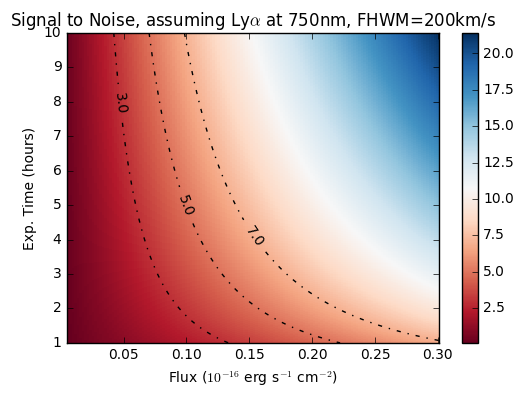

In [29]:
path = '/Users/justin/Documents/Master_Thesis/data/catalogues/chandra_7ms/big_table.fits'
big_table = fits.open(path)[1].data
#flux in e-16 erg s-1 cm-2
#FWHM in nm
#hours of exptime
#S/N for 2 h (8*900 s)
#3 days from new moon, 1.2 AM, 1" seeing, 1"5 slit width, 900s exptime, n NEXP, high 2*2 slow det. mode
#7500 Ang: -> 0.5 nm FWHM if 200 km/s is assumed (Ben)
#S/N = sqrt(expT)
#take flux values 0.01,0.03,0.1,0.3 e-16
dat5 = [[0.01,0.5,2,0.33],
       [0.03,0.5,2,0.99],
       [0.1,0.5,2,3.2],
        [0.3,0.5,2,9.2]]
    
def f(T,F):
    r=((0.01/0.33)+(0.03/0.99)+(0.1/3.2)+(0.3/9.2))/4.
    sn=0.99*(F/r)*((T/2.)**0.5)
    return sn

dT=0.02
dF=0.002
T, F = np.mgrid[slice(1, 10 + dT, dT),
                slice(0.005, 0.3 + dF, dF)]
sn=f(T,F)
#sn = sn[:-1, :-1]
sn_min, sn_max = sn.min(), sn.max()

f = plt.figure()
ax = f.add_subplot(111)
plt.pcolor(F, T, sn, cmap='RdBu',vmin=sn_min, vmax=sn_max)
plt.axis([F.min(), F.max(), T.min(), T.max()])
plt.colorbar()
CS = plt.contour(F, T, sn, [3,5,7], colors='k',linestyles='dashdot')
plt.clabel(CS, inline=1, fontsize=10, manual=[(0.06,8.),(0.1,5.),(0.15,4.)], fmt='%1.1f')
plt.xlabel('Flux ($10^{-16}$ erg s$^{-1}$ cm$^{-2}$)')
plt.ylabel('Exp. Time (hours)')
plt.title(r'Signal to Noise, assuming Ly$\alpha$ at 750nm, FHWM=200km/s')
path = '/Users/justin/Documents/Master_Thesis/presentation/plots/exptime_calc.pdf'
plt.savefig(path, format='pdf', dpi=500,bbox_inches='tight')